In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('wine_data.csv')


In [3]:
print(df.head())


  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                  

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB
None


In [5]:
print(df.describe())


       fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
count                                                4898                                                                                                                     
unique                                               3961                                                                                                                     
top     7.3;0.19;0.27;13.9;0.057;45;155;0.99807;2.94;0...                                                                                                                     
freq                                                    8                                                                                                                     


In [6]:
df.dropna(inplace=True)


In [9]:
print(df.columns)


Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


In [14]:
# Read the wine dataset into a DataFrame with the correct delimiter
df = pd.read_csv('wine_data.csv', delimiter=';')

# Check the column names in the DataFrame
print(df.columns)

# Ensure that the column names match those used in the 'features' list
# If the column names are different, update the 'features' list accordingly
# For example, if the column names have extra spaces, remove them

# Select relevant features for the prediction task
features = [
    "fixed acidity", "volatile acidity", "citric acid", 
    "residual sugar", "chlorides", "free sulfur dioxide", 
    "total sulfur dioxide", "density", "pH", "sulphates", 
    "alcohol"
]

# Create a new DataFrame with only the selected features and the target variable (quality)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [15]:
selected_df = df[features + ["quality"]]


In [16]:
correlation_matrix = selected_df.corr()
print(correlation_matrix["quality"])


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


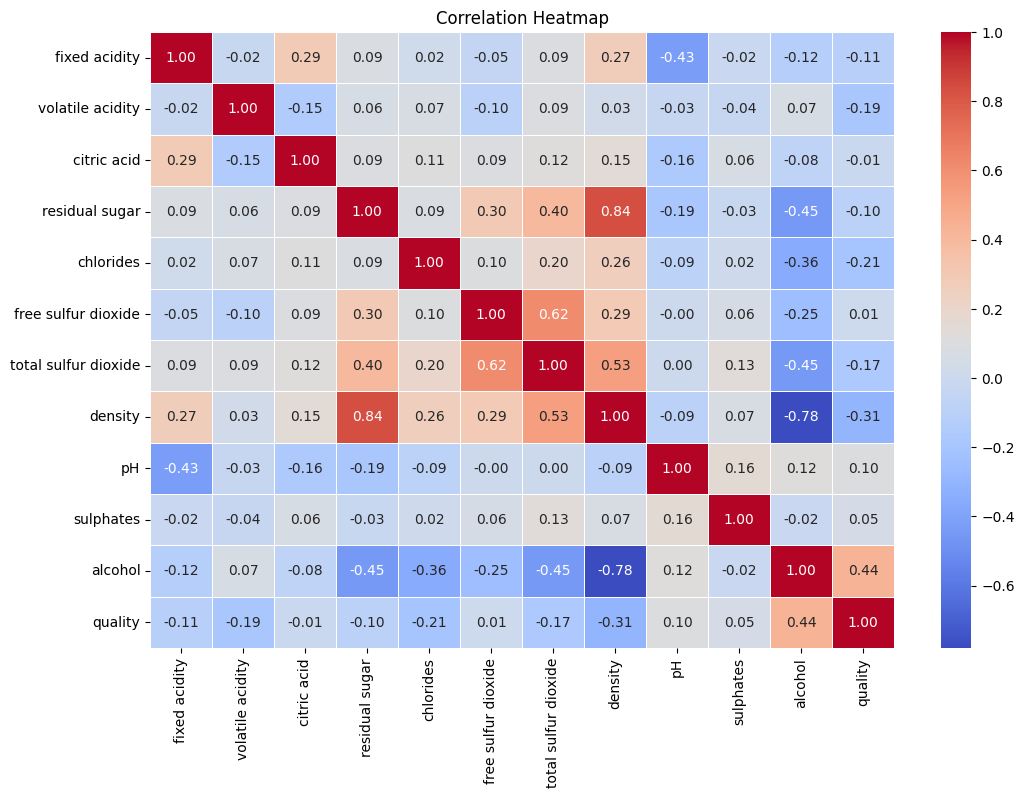

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# Prepare the data for machine learning
X = selected_df.drop(columns=["quality"])  # Features
y = selected_df["quality"]  # Target variable


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.7s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [22]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [23]:
# Train the model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, n_estimators=300, random_state=42)

In [24]:
# Evaluate the model
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Train Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)
print("Train R-squared Score:", r2_train)
print("Test R-squared Score:", r2_test)

Train Mean Squared Error: 0.05189286202963215
Test Mean Squared Error: 0.34532153595364073
Train R-squared Score: 0.934013236353065
Test R-squared Score: 0.5541207050111634


In [25]:
# Perform feature importance analysis
feature_importances = best_rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                 Feature  Importance
10               alcohol    0.241007
1       volatile acidity    0.124857
5    free sulfur dioxide    0.117056
8                     pH    0.069879
6   total sulfur dioxide    0.069418
3         residual sugar    0.069266
9              sulphates    0.062625
0          fixed acidity    0.062563
4              chlorides    0.062396
7                density    0.061352
2            citric acid    0.059581


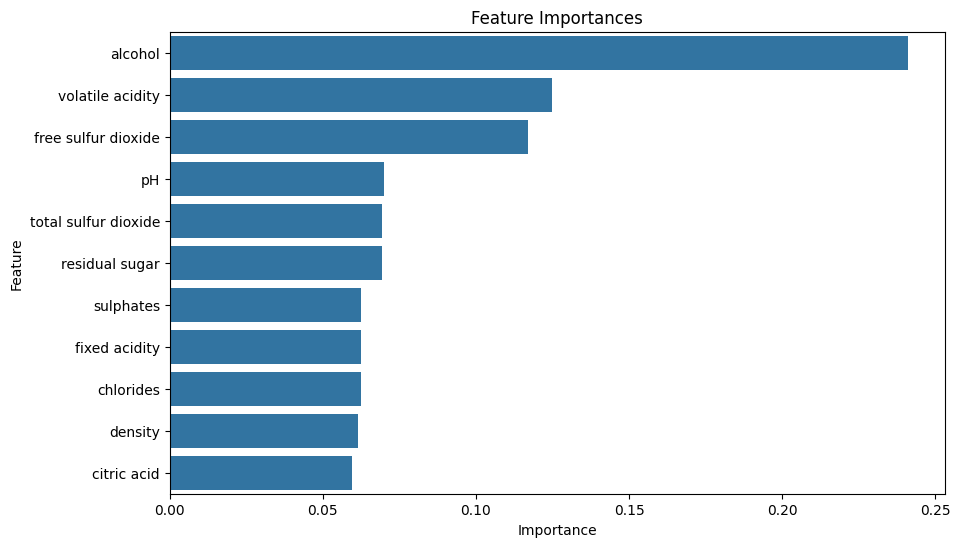

In [26]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [31]:
import pickle

# Assuming 'model' is your trained machine learning model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_rf_regressor, f)

# Assuming 'model' is your trained machine learning model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [32]:
# Function to make predictions
def predict_wine_quality(data):
    # Modify this function to use your prediction code
    prediction = model.predict(data)
    return prediction